# The 2021 onset of the spring bloom in the eastern subpolar North Atlantic

Name:

Collaborators:


# Data sources

Satellite data is from the [MODIS sensor on NASA's Aqua satellite](https://modis.gsfc.nasa.gov/data/dataprod/chlor_a.php) most easily accessed by [this interactive viewer](https://oceancolor.gsfc.nasa.gov/l3/).

Some other interactive pages that give windows into what's going on are:
+ https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MY1DMW_CHLORA&year=2021
+ https://www.nnvl.noaa.gov/view/globaldata.html#ALGE
+ https://livingatlas.arcgis.com/emu/

To do:
1. download MODIS data
2. code for plotting/loadings MODIS

4. batch convert sg data to .hb
    + for each .nc
    + if there is no .hb
    + convert to .hb
5. make MODIS mean
6. plot MODIS anomalies
7. plot climatology data
8. plot sg data
9. download additional sg data (if needed)

In [3]:
import load_glider_data as sg
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#=================================
# Function to find the mixed layer
# depth (MLD) based on the depth
# of first occurance of a density
# difference greater than s0_thresh
# (the threshold density difference).
def find_mld(de,s0,s0_thresh):
    # Find the difference with the surface
    # density.  Since bubbles at the surface
    # can cause bad density values at the
    # very top of the water column, find the
    # minimum density of the profile after
    # ignoring all the NaN (not a number)
    # placeholders for missing/bad data.
    ds0 = s0-s0[~np.isnan(s0)].min()
    
    # Find all the values that are right at
    # and below the MLD.  Select the single
    # value at the MLD by taking the minimum
    # depth and density.
    return de[ds0 > s0_thresh].min(), s0[ds0 > s0_thresh].min()
    

# Results

## Step 1: Climatological profiles

Load the climatological (time-mean) profiles from 10.1W, 57.1N from [Gary et al. (2018)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017JC013350).  These profiles have exactly the same format as the glider data we plotted previously although they are really a blend of ship, glider, and other robot observations - basically all data available in the region!  They represent the best estimate of long-term average conditions for each season.  To access them, use glider number `'000'` and request profiles `['DJF', 'MAM', 'JJA', and 'SON']`.  The goal for Figure 1 is to plot the seasonal climatological profiles of density and using the `find_mld` function above, also plot the mixed layer depth.  The resulting figure should look a lot like Segar's [Chapter 8](https://reefimages.com/oceans/SegarOcean4Chap08.pdf)'s Figure 8-20, but all profiles are overlaid on top of each other.

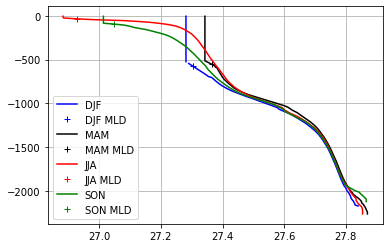

In [14]:
fig, ax = plt.subplots()

[lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000','DJF')
ax.plot(s0,-1.0*de,'b-')

de_mld, s0_mld = find_mld(de,s0,0.02)
ax.plot(s0_mld,-1.0*de_mld,'b+')

[lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000','MAM')
ax.plot(s0,-1.0*de,'k-')

de_mld, s0_mld = find_mld(de,s0,0.02)
ax.plot(s0_mld,-1.0*de_mld,'k+')

[lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000','JJA')
ax.plot(s0,-1.0*de,'r-')

de_mld, s0_mld = find_mld(de,s0,0.02)
ax.plot(s0_mld,-1.0*de_mld,'r+')

[lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000','SON')
ax.plot(s0,-1.0*de,'g-')

de_mld, s0_mld = find_mld(de,s0,0.02)
ax.plot(s0_mld,-1.0*de_mld,'g+')

ax.legend(['DJF','DJF MLD','MAM','MAM MLD','JJA','JJA MLD','SON','SON MLD'])
ax.grid()


Description of the results Step 1 goes here.

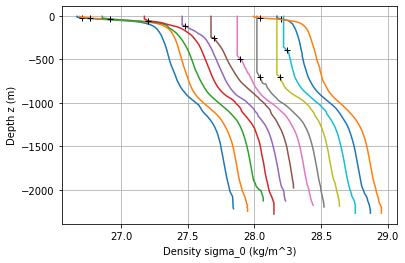

In [16]:
# Monthly climatology waterfall plot to describe MLD (for use in class)

fig, ax = plt.subplots()

mons = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

s0_offset = 0.0
ds0 = 0.1

for mon in mons:
    [lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000',mon)
    ax.plot(s0+s0_offset,-1.0*de)
    
    de_mld, s0_mld = find_mld(de,s0,0.02)
    ax.plot(s0_mld+s0_offset,-1.0*de_mld,'k+')

    s0_offset = s0_offset + ds0
    
ax.set_xlabel('Density sigma_0 (kg/m^3)')
ax.set_ylabel('Depth z (m)')
ax.grid()

In [ ]:
# Step 2: Satellite data showing sea surface chloropyll


Description of the results Step 2 goes here.

# Discussion

Discussion questions go here.

# References